In [707]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("Fbdata.csv")
df

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.000000,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.000000,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.000000,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.000000,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.000000,1,1.29,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,45-49,F,109,111,114,1129773,252,358.189997,13,2.00,NaN,NaN
1139,1314411,19/08/2017,19/08/2017,45-49,F,110,111,116,637549,120,173.880003,3,0.00,NaN,NaN
1140,1314412,19/08/2017,19/08/2017,45-49,F,111,113,117,151531,28,40.289999,2,0.00,NaN,NaN
1141,1314414,17/08/2017,17/08/2017,45-49,F,113,114,117,790253,135,198.710001,8,2.00,NaN,NaN


In [708]:
df.dtypes

ad_id                    int64
reporting_start         object
reporting_end           object
campaign_id             object
fb_campaign_id          object
age                     object
gender                  object
interest1                int64
interest2                int64
interest3                int64
impressions            float64
clicks                   int64
spent                  float64
total_conversion       float64
approved_conversion    float64
dtype: object

In [709]:
missing_values = df.isnull().sum()
missing_values

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
dtype: int64

In [710]:
df['total_conversion'] = df['total_conversion'].fillna(df['total_conversion'].mean())
df['approved_conversion'] = df['approved_conversion'].fillna(df['approved_conversion'].mean())

In [711]:
# Convert date columns to datetime 
df['reporting_start'] = pd.to_datetime(df['reporting_start'], format='%d/%m/%Y')
df['reporting_end'] = pd.to_datetime(df['reporting_end'], format='%d/%m/%Y')

In [712]:
# Calculate Campaign Duration
df['campaign_duration'] = (df['reporting_end'] - df['reporting_start']).dt.days
df['campaign_duration'].head()

0    0
1    0
2    0
3    0
4    0
Name: campaign_duration, dtype: int64

In [713]:
# Calculate Engagement Rate, avoiding division by zero
df['engagement_rate'] = df['clicks'] / df['impressions'].replace(0, 1e-10)
df['engagement_rate'].head()

0    0.000136
1    0.000112
2    0.000000
3    0.000235
4    0.000242
Name: engagement_rate, dtype: float64

In [714]:
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

In [715]:
# Remove duplicate rows
data_unique = df.drop_duplicates()
data_unique.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,campaign_duration,engagement_rate
0,708746,2017-08-17,2017-08-17,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0,0.000136
1,708749,2017-08-17,2017-08-17,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0,0.000112
2,708771,2017-08-17,2017-08-17,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0,0.000000
3,708815,2017-08-30,2017-08-30,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0,0.000235
4,708818,2017-08-17,2017-08-17,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0,0.000242


In [716]:
# Check for NaN or infinite values
print("Checking for NaN values:")
print(df.isna().sum())

print("Checking for infinite values:")
print((df == float('inf')).sum())

Checking for NaN values:
ad_id                  0
reporting_start        0
reporting_end          0
campaign_id            0
fb_campaign_id         0
age                    0
gender                 0
interest1              0
interest2              0
interest3              0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
campaign_duration      0
engagement_rate        0
dtype: int64
Checking for infinite values:
ad_id                  0
reporting_start        0
reporting_end          0
campaign_id            0
fb_campaign_id         0
age                    0
gender                 0
interest1              0
interest2              0
interest3              0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
campaign_duration      0
engagement_rate        0
dtype: int64


In [717]:
df.drop(columns=['fb_campaign_id',], inplace=True) # TODO: Removed the campaign_id as well as start/end of reporting as they are still needed


In [718]:
# Encode categorical variables
# TODO: Do we really need this?
# label_encoder = LabelEncoder()
# df['gender'] = label_encoder.fit_transform(df['gender'])
# df['age'] = label_encoder.fit_transform(df['age'])

In [719]:
df.dtypes

ad_id                           int64
reporting_start        datetime64[ns]
reporting_end          datetime64[ns]
campaign_id                    object
age                            object
gender                         object
interest1                       int64
interest2                       int64
interest3                       int64
impressions                   float64
clicks                          int64
spent                         float64
total_conversion              float64
approved_conversion           float64
campaign_duration               int64
engagement_rate               float64
dtype: object

In [720]:
print("Grab the first dataset for analysis:")
df = df[:761]

Grab the first dataset for analysis:


In [721]:
print("Start analysis of the following data:")
df

Start analysis of the following data:


,ad_id,reporting_start,reporting_end,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,campaign_duration,engagement_rate
0,708746,2017-08-17,2017-08-17,916,30-34,M,15,17,17,7350.0,1,1.430000,2.0,1.0,0,0.000136
1,708749,2017-08-17,2017-08-17,916,30-34,M,16,19,21,17861.0,2,1.820000,2.0,0.0,0,0.000112
2,708771,2017-08-17,2017-08-17,916,30-34,M,20,25,22,693.0,0,0.000000,1.0,0.0,0,0.000000
3,708815,2017-08-30,2017-08-30,916,30-34,M,28,32,32,4259.0,1,1.250000,1.0,0.0,0,0.000235
4,708818,2017-08-17,2017-08-17,916,30-34,M,28,33,32,4133.0,1,1.290000,1.0,1.0,0,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1121585,2017-08-20,2017-08-20,1178,40-44,M,66,72,68,9773.0,1,1.460000,1.0,0.0,0,0.000102
757,1121589,2017-08-20,2017-08-20,1178,45-49,M,10,16,11,464036.0,77,123.550000,3.0,1.0,0,0.000166
758,1121590,2017-08-20,2017-08-20,1178,45-49,M,10,16,15,478480.0,75,135.750001,3.0,1.0,0,0.000157
759,1121592,2017-08-20,2017-08-20,1178,45-49,M,10,14,11,428812.0,66,116.880000,4.0,2.0,0,0.000154


In [722]:
print("Analysis of users interactions:\n")

print("Gender ratio:")

# Count the gender instances
df.gender.value_counts()

Analysis of users interactions:

Gender ratio:


gender
M    486
F    275
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='Count'>

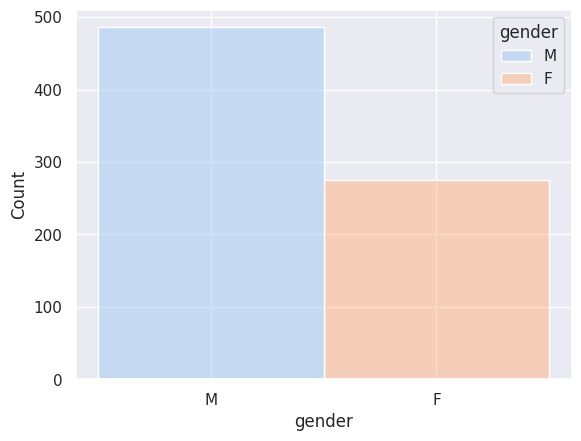

In [723]:
# Plot the gender distribution
sns.histplot(data=df, x='gender', hue='gender', palette='pastel')

In [724]:
print("Age groups:")

# Count the different groups
df.age.value_counts()

Age groups:


age
30-34    327
35-39    180
40-44    139
45-49    115
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

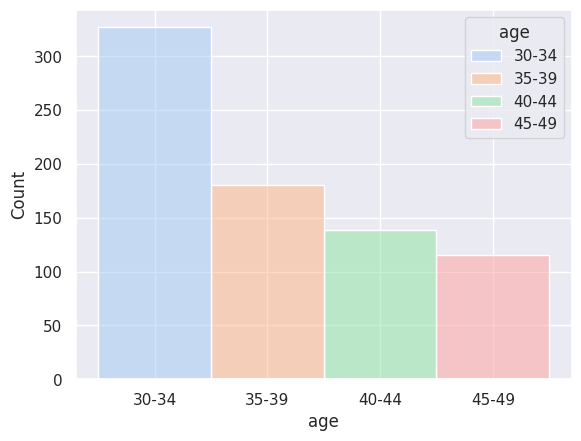

In [725]:
# Plot the age groups
sns.histplot(data=df, x='age', hue='age', palette='pastel')

In [726]:
print('Gender distribution per campaign:')

print(df.groupby(['campaign_id', 'gender']).size())


Gender distribution per campaign:
campaign_id  gender
1178         M         243
916          F          19
             M          35
936          F         256
             M         208
dtype: int64


<Axes: xlabel='campaign_id', ylabel='count'>

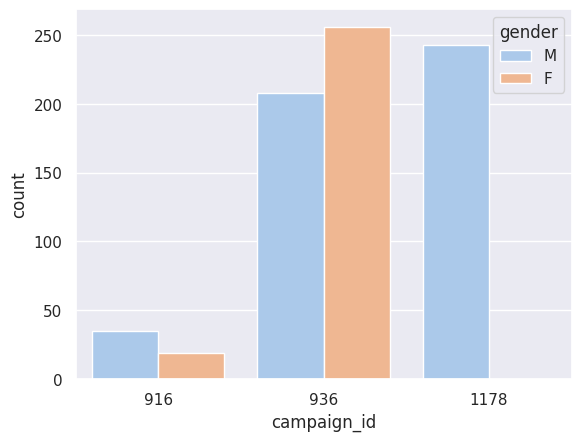

In [727]:
sns.countplot(data=df, x='campaign_id', hue='gender', palette='pastel')

In [728]:
print('Age distribution per campaign:')

print(df.groupby(['campaign_id', 'age']).size())

Age distribution per campaign:
campaign_id  age  
1178         30-34    102
             35-39     79
             40-44     58
             45-49      4
916          30-34     29
             35-39     12
             40-44      6
             45-49      7
936          30-34    196
             35-39     89
             40-44     75
             45-49    104
dtype: int64


<Axes: xlabel='campaign_id', ylabel='count'>

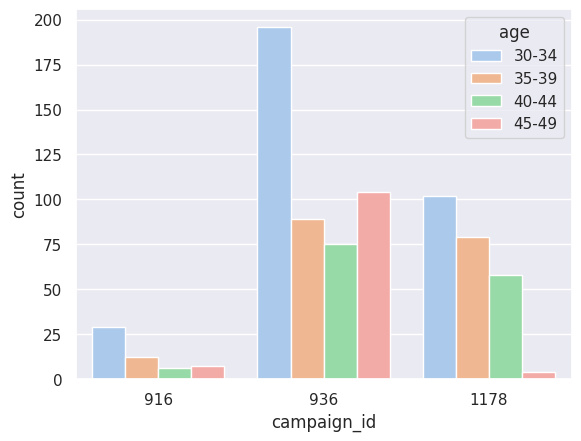

In [729]:
sns.countplot(data=df, x='campaign_id', hue='age', palette='pastel')

In [730]:
print("Analysis of the engagement with different types of content:")

# TODO: This is supposed to be the interests??? The interests don't really give us much information according to the one who created the dataset.
print(df.groupby('campaign_id').clicks.sum())

Analysis of the engagement with different types of content:
campaign_id
1178    9577
916      113
936     1984
Name: clicks, dtype: int64


In [731]:
print("Analysis of timeframe:")

print(df.campaign_duration.value_counts())

Analysis of timeframe:
campaign_duration
0    761
Name: count, dtype: int64


In [732]:
# Get the duration for each of the campaigns
print(df.groupby(['campaign_id', 'reporting_start']).size())

campaign_id  reporting_start
1178         2017-08-18          5
             2017-08-19         18
             2017-08-20         23
             2017-08-21         19
             2017-08-22         23
             2017-08-23         38
             2017-08-24         24
             2017-08-25         17
             2017-08-26         14
             2017-08-27         11
             2017-08-28         21
             2017-08-29         18
             2017-08-30         12
916          2017-08-17         16
             2017-08-18         11
             2017-08-19          2
             2017-08-25          1
             2017-08-26          4
             2017-08-27          6
             2017-08-29          5
             2017-08-30          9
936          2017-08-18         54
             2017-08-19         53
             2017-08-20         42
             2017-08-21         61
             2017-08-22         50
             2017-08-23         47
             2017-08-24   

<Axes: xlabel='campaign_id', ylabel='reporting_start'>

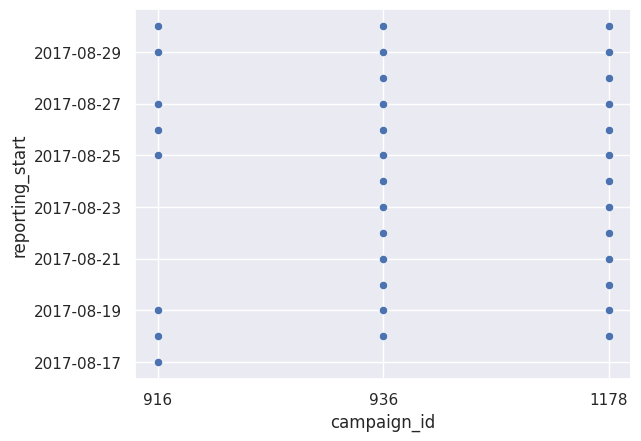

In [733]:
sns.scatterplot(data=df, x='campaign_id', y='reporting_start')